In [1]:
import cv2
import pims
import matplotlib.pyplot as plt 
from skimage.metrics import structural_similarity as ssim

# Open the video file
movie = pims.Video("Data\PartA\CellA_noDoxycycline.avi")


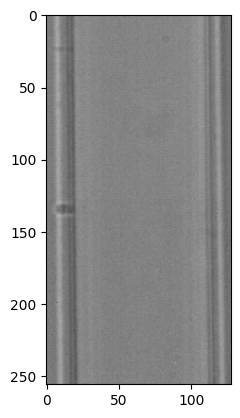

In [2]:
plt.imshow(movie[0])

In [3]:
import numpy as np
from skimage.metrics import mean_squared_error

MSE 99-100
50.033843994140625
MSE 99-102
14.12091064453125
MSE 100-101
52.773345947265625
MSE 99-101
16.098388671875


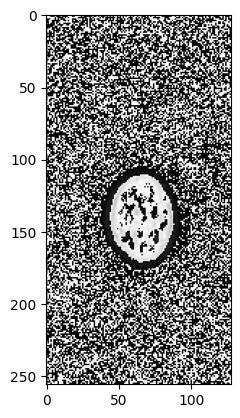

In [4]:
img_cell=movie[100]
img_cell_2=movie[101]
img_no_cell=movie[99]
img_no_cell_2=movie[102]

plt.imshow(img_cell-img_no_cell)
print('MSE 99-100')
print(mean_squared_error(img_no_cell,img_cell))
print('MSE 99-102')
print(mean_squared_error(img_no_cell,img_no_cell_2))
print('MSE 100-101')
print(mean_squared_error(img_cell,img_cell_2))
print('MSE 99-101')
print(mean_squared_error(img_no_cell,img_cell_2))

#print('SSIM 99-100')
#ssim_1=ssim(img_no_cell,img_cell,data_range=np.max(img_cell)-np.min(img_cell),gaussian_weights=True,sigma=1.5,use_sample_covariance=False)
#print(ssim_1)
#print('SSIM 100-99')
#print(str(ssim(img_cell,img_no_cell,data_range=np.max(img_no_cell)-np.min(img_no_cell))))


We will keep every frame that has a MSE higher than 35 with respect to the first image.

In [5]:
print(np.shape(movie)[0])
print(movie[8][0][0])

356953
[125 125 125]


Test performed on a sample of the video

In [18]:
# Read the first frame as the reference image
reference_frame = movie[0]

nb_frame=1000

movie_copy=[]

for i in range(nb_frame):
    if i%100==0:
        print(i)
    current_frame=movie[i]
    if mean_squared_error(reference_frame,current_frame) > 35:
        movie_copy.append(current_frame)
    else:
        continue


0
100
200
300
400
500
600
700
800
900


In [24]:
# Read the first frame as the reference image
reference_frame = movie[0]

nb_frame=np.shape(movie)[0]

movie_copy=[]

for i in range(nb_frame):
    if i%10000==0:
        print(i)
    current_frame=movie[i]
    if mean_squared_error(reference_frame,current_frame) > 35:
        movie_copy.append(current_frame)
    else:
        continue


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000


In [27]:
import skvideo.io

movie_copy_array=np.array(movie_copy)

# save path and fps
video_save_path = "Results\PartA\cell_only_cellA_noDoxycycline.avi"
fps = 30
# create writer using FFmpegWriter
writer = skvideo.io.FFmpegWriter(video_save_path, 
                        inputdict={'-r': str(fps)},
                        outputdict={'-r': str(fps), '-c:v': 'libx264', '-preset': 'ultrafast', '-pix_fmt': 'yuv444p'})


In [28]:
nb_frame_final=len(movie_copy)

for i in range(nb_frame_final):
    writer.writeFrame(movie_copy_array[i, :, :, :])
writer.close()

In [29]:
print(nb_frame_final)

8887
